# Results

In [137]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [138]:
df = pd.read_csv("../data/combined_data.csv")
df.head()

,Country,Region,Year,Status,PR rating,CL rating,PR,CL,Total,Gross enrollment ratio - Lower secondary level (female),...,GDP real rates of growth (percent),Population aged 0 to 14 years old (percentage),Population aged 60+ years old (percentage),Population density,Population mid-year estimates (millions),Population mid-year estimates for females (millions),Population mid-year estimates for males (millions),Sex ratio (males per 100 females),Surface area (thousand km2),Percentage of individuals using the internet
0,Afghanistan,Asia,2015,NF,6,6,11,13,24,47.0,...,-2.5,46.3,3.7,52.1,33.83,16.73,17.1,102.2,NaN,8.3
1,Afghanistan,Asia,2018,NF,5,6,12,14,26,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Asia,2019,NF,5,6,13,14,27,53.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Asia,2020,NF,5,6,13,14,27,NaN,...,-2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Asia,2021,NF,5,6,13,14,27,NaN,...,-20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Imputing Data

In [139]:
vars = df.columns[9:]

country_means = df.groupby('Country')[vars].mean()

region_means = df.groupby('Region')[vars].mean()

def impute(row):
    for var in vars:
        if pd.isna(row[var]):
            country = row["Country"]
            region = row["Region"]

            if not pd.isna(country_means.loc[country, var]):
                row[var] = country_means.loc[country, var]

            elif not pd.isna(region_means.loc[region, var]):
                row[var] = region_means.loc[region, var]

    return row

df_imputed = df.apply(impute, axis = 1)
df_imputed = df_imputed.dropna(subset = vars)
df_imputed.head()

,Country,Region,Year,Status,PR rating,CL rating,PR,CL,Total,Gross enrollment ratio - Lower secondary level (female),...,GDP real rates of growth (percent),Population aged 0 to 14 years old (percentage),Population aged 60+ years old (percentage),Population density,Population mid-year estimates (millions),Population mid-year estimates for females (millions),Population mid-year estimates for males (millions),Sex ratio (males per 100 females),Surface area (thousand km2),Percentage of individuals using the internet
0,Afghanistan,Asia,2015,NF,6,6,11,13,24,47.000000,...,-2.500,46.300000,3.7,52.1,33.83,16.730000,17.100000,102.200000,653.0,8.3
1,Afghanistan,Asia,2018,NF,5,6,12,14,26,52.000000,...,-7.875,44.266667,3.8,60.1,39.02,19.316667,19.703333,102.033333,653.0,8.3
2,Afghanistan,Asia,2019,NF,5,6,13,14,27,53.800000,...,-7.875,44.266667,3.8,60.1,39.02,19.316667,19.703333,102.033333,653.0,8.3
3,Afghanistan,Asia,2020,NF,5,6,13,14,27,50.933333,...,-2.100,44.266667,3.8,60.1,39.02,19.316667,19.703333,102.033333,653.0,8.3
4,Afghanistan,Asia,2021,NF,5,6,13,14,27,50.933333,...,-20.700,44.266667,3.8,60.1,39.02,19.316667,19.703333,102.033333,653.0,8.3


## Finding Number of PCA Components

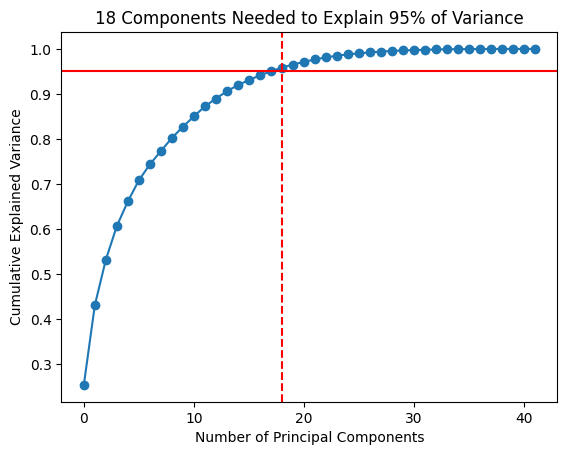

In [140]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df_imputed.iloc[:, 9:]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

cum_var = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cum_var >= 0.95) + 1

plt.figure()

plt.plot(cum_var, marker = 'o')
plt.axvline(x = n_components_95, color = 'red', linestyle = '--')
plt.axhline(y = 0.95, color = 'red')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title(f'{n_components_95} Components Needed to Explain 95% of Variance')
plt.show()

## Using PCA for Linear Regression

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df_imputed.iloc[:, 9:]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components = n_components_95).fit(X_scaled)

X_pca = pca.transform(X_scaled)
y = df_imputed.iloc[:, 8]

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 42)

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(f"R^2 Score: {r2_score(y_test, y_pred):.3f}")
print(f"Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")

R^2 Score: 0.547
Mean Squared Error: 19.892


## Ordinary Linear Regression

In [142]:
X = df_imputed.iloc[:, 9:]
y = df_imputed.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
reg = LinearRegression().fit(X_train, y_train)


reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(f"R^2 Score: {r2_score(y_test, y_pred):.3f}")
print(f"Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")

R^2 Score: 0.668
Mean Squared Error: 17.016


### Coefficients Table For OLS

In [143]:
coefficients = reg.coef_
feature_names = X.columns

coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coeff_df.sort_values(by = "Coefficient", ascending = True)

,Feature,Coefficient
36,Population mid-year estimates (millions),-8.046154e+01
12,Labour force participation - Total,-5.580409e+00
19,Percentage of male and female intentional homi...,-2.135328e+00
13,Unemployment rate - Female,-1.537925e+00
3,Gross enrollment ratio - Primary (male),-5.355586e-01
9,"Seats held by women in national parliament, as...",-4.295840e-01
5,Gross enrollment ratio - Upper secondary level...,-3.860146e-01
25,"Safely managed drinking water sources, urban (...",-2.759587e-01
20,Percentage of male and female intentional homi...,-2.747877e-01
18,"Kidnapping at the national level, rate per 100...",-2.538815e-01


## Linear Regression With Manually Removed Columns

In [144]:
df_testing = df_imputed.copy()
df_testing = df_testing.drop(columns = ['Labour force participation - Total', 
                                        'GDP in constant 2015 prices (millions of US dollars)',
                                        'Safely managed sanitation facilities, rural (Proportion of population with access)',
                                        'Safely managed sanitation facilities, urban (Proportion of population with access)',
                                        'Safely managed drinking water sources, urban (Proportion of population with access)',
                                        'Safely managed drinking water sources, rural (Proportion of population with access)',
                                        'Unemployment rate - Total',
                                        'Population mid-year estimates (millions)'])

In [145]:
X = df_testing.iloc[:, 9:]
y = df_testing.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
reg = LinearRegression().fit(X_train, y_train)


reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(f"R^2 Score: {r2_score(y_test, y_pred):.3f}")
print(f"Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")

coefficients = reg.coef_
feature_names = X.columns

coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coeff_df.sort_values(by = "Coefficient", ascending = False)

R^2 Score: 0.659
Mean Squared Error: 17.248


,Feature,Coefficient
27,Population aged 60+ years old (percentage),2.598321
15,"Intentional homicide rates per 100,000",1.276309
13,Unemployment rate - Male,1.247769
26,Population aged 0 to 14 years old (percentage),1.155167
30,Population mid-year estimates for males (milli...,0.769647
2,Gross enrollment ratio - Primary (female),0.653405
4,Gross enrollment ratio - Upper secondary level...,0.422014
11,Labour force participation - Male,0.300867
0,Gross enrollment ratio - Lower secondary level...,0.267233
33,Percentage of individuals using the internet,0.183944
